In [1]:
import networkx as nx
import random
import numpy as np
from matplotlib import pyplot as plt

In [11]:
N = 100
k = 8
p = 0
q = .5

In [12]:
def make_graph(N, beta):
    g1 = nx.Graph()
    lwd = int(np.floor(np.sqrt(N)))
    base = np.arange(N).reshape((lwd, lwd))
    for i in range(N):
        g1.add_node(i)
    for i in range(N):
        nbh1 = (i//lwd) * lwd + (i % lwd + 1) % lwd
        nbh2 = (lwd + i//lwd - 1) % lwd * lwd + i % lwd
        nbh3 = (lwd + i//lwd - 1) % lwd * lwd + (i % lwd + 1) % lwd
        nbh4 = (lwd + i//lwd - 1) % lwd * lwd + (i % lwd + lwd - 1) % lwd
        nbhs = np.asarray([nbh1, nbh2, nbh3, nbh4])
        check = np.random.random(4)
        nbhs_not = nbhs[check < beta]
        nbhs = nbhs[check > beta]
        for j in range(len(nbhs_not)):
            np.append(nbhs, np.random.choice(list(set(range(N)) - set([i, nbhs_not[j]]))))
        for nbh in nbhs:
            g1.add_edge(i, nbh)
    return g1

In [257]:
np.arange(100).reshape((10, 10))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [13]:
def get_all_weights(g1):
    return sum(nx.get_node_attributes(g1, 'weight').values())

In [14]:
def get_nbh_weights(g1, n):
    return sum(nx.get_node_attributes(g1.subgraph(g1.neighbors(n)), 'weight').values())

In [15]:
def sim(g1, N, p, q, k):
    ws = [get_all_weights(g1)]
    while (ws[-1] != N) and (len(ws) < 10**3):
        poses = np.floor(N * np.random.random(N))
        for i in poses:
            if (g1.nodes[i]['weight'] == 0):
                frac = get_nbh_weights(g1, i) / k
                if random.random() < (p + q * frac):
                    g1.nodes[i]['weight'] = 1
        ws.append(get_all_weights(g1))
    return np.asarray(ws)/N

In [16]:
def sim_zero(N, p, q, k, beta):
    g1 = make_graph(N=N, beta=beta)
    for i in g1.nodes:
        g1.nodes[i]['weight'] = 0
    return sim(g1 = g1, N = N, p = p, k = k, q = q)

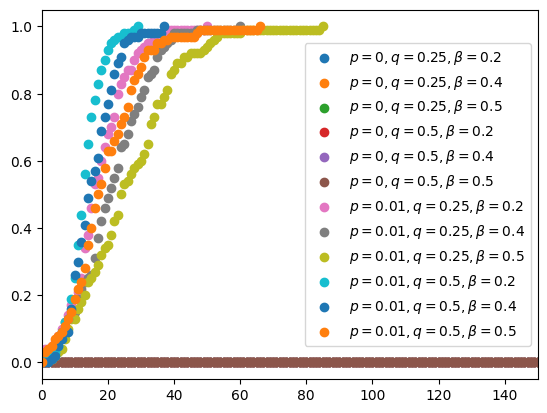

In [270]:
for p in [0, .01]:
    for q in [.25, .5]:
        for beta in [.2, .4, .5]:
            temp = sim_zero(N=N, p=p, q=q, k=k, beta=beta)
            plt.scatter(np.arange(len(temp)), temp, label=f'$p={p}, q={q}, \\beta = {beta}$')
plt.xlim([0,150])
plt.legend()
plt.show()

In [17]:
def sim_random_eight(N, p, q, k, beta):
    g1 = make_graph(N=N, beta=beta)
    for i in g1.nodes:
        g1.nodes[i]['weight'] = 0
    poses = np.floor(N * np.random.random(8))
    for i in poses:
        g1.nodes[i]['weight'] = 1
    return sim(g1 = g1, N = N, p = p, k = k, q = q)

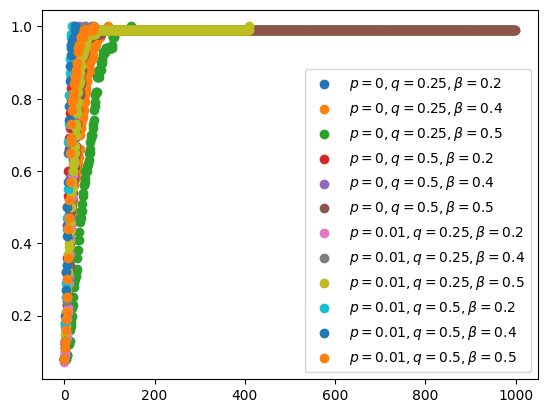

In [272]:
for p in [0, .01]:
    for q in [.25, .5]:
        for beta in [.2, .4, .5]:
            temp = sim_random_eight(N=N, p=p, q=q, k=k, beta=beta)
            plt.scatter(np.arange(len(temp)), temp, label=f'$p={p}, q={q}, \\beta = {beta}$')
plt.legend()
plt.show()

In [18]:
M = 100
for p in [0, .01]:
    for q in [.25, .5]:
        temp = []
        betas = np.round(np.arange(0, 1, .01),2)
        for beta in betas:
            temp.append(np.asarray([len(sim_random_eight(N=N, p=p, q=q, k=k, beta=beta)) for i in range(M)]).mean())
        plt.scatter(betas, temp, label=f'$p={p}$, q={q}')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
M = 100
for p in [0, .01]:
    for q in [.25, .5]:
        temp = []
        betas = np.round(np.arange(0, 1, .01),2)
        for beta in betas:
            temp.append(np.asarray([len(sim_zero(N=N, p=p, q=q, k=k, beta=beta)) for i in range(M)]).mean())
        plt.scatter(betas, temp, label=f'$p={p}$, q={q}')
plt.legend()
plt.show()

In [104]:
o1 = [len(sim_random_eight(N=N, p=p, q=q, k=k)) for i in range(10)]

In [107]:
np.mean(o1)

np.float64(19.0)

In [276]:
def func1(x, p, q):
    return (1 - x) * (p + q * x)

In [277]:
def euler(x0, func, ts, p, q):
    xs = np.zeros(len(ts))
    xs[0] = x0    
    for i in range(1, len(ts)):
        xs[i] = xs[i-1] + func(xs[i-1], p, q) * (ts[i] - ts[i-1])
    return xs

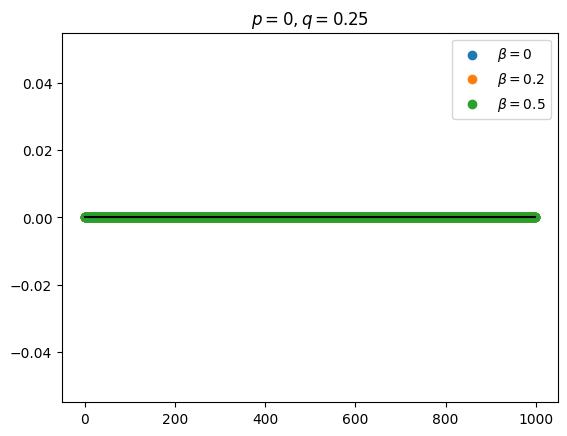

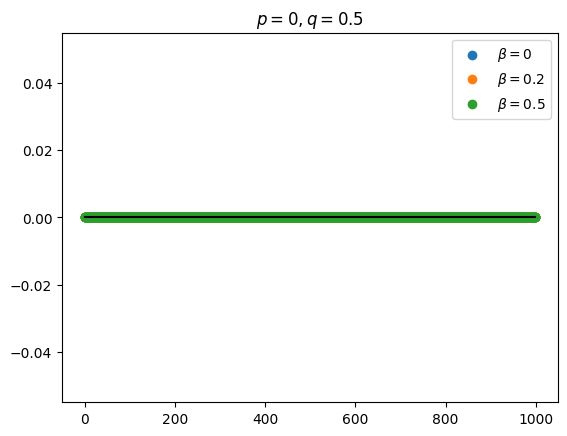

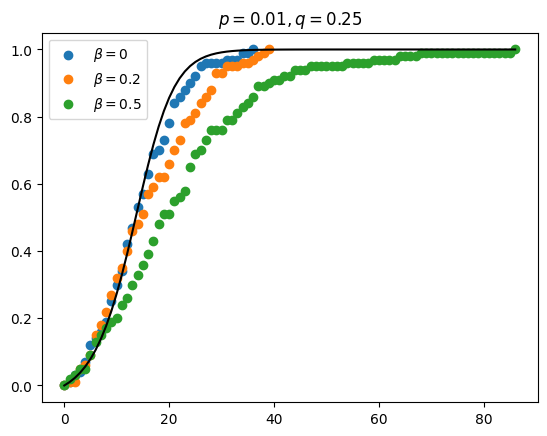

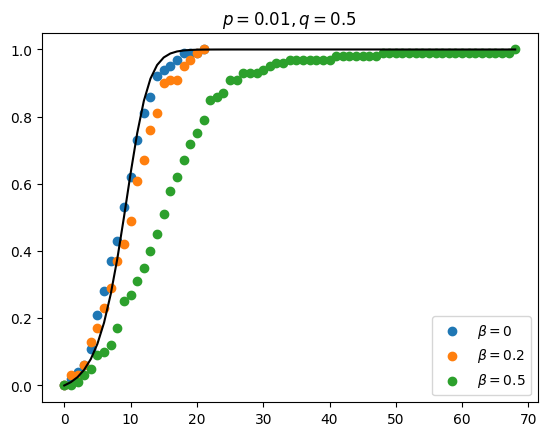

In [278]:
for p in [0, .01]:
    for q in [.25, .5]:
        for beta in [0, .2, .5]:
            temp = sim_zero(N=N, p=p, q=q, k=k, beta=beta)
            ts = np.arange(len(temp))
            t_temp = euler(0, func1, ts, p, q)
            plt.scatter(ts, temp, label=f'$\\beta = {beta}$')
        plt.plot(ts, t_temp, color='black')
        plt.title(f'$p={p}, q={q}$')
        plt.legend()
        plt.show()

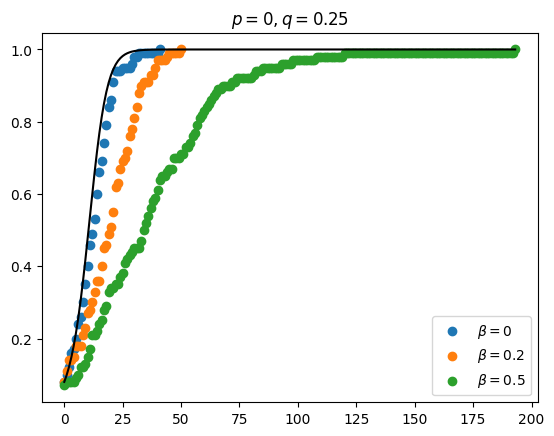

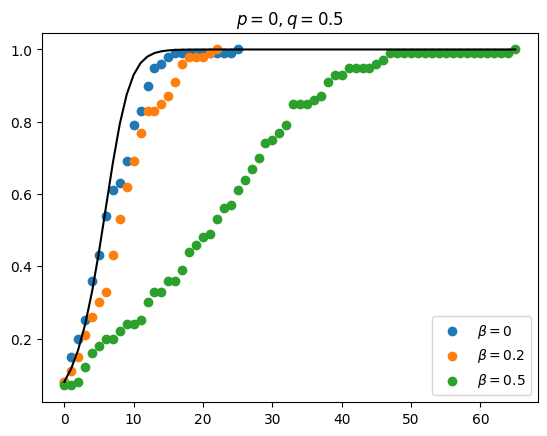

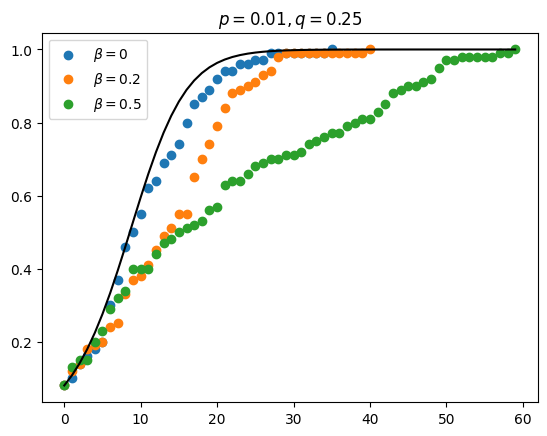

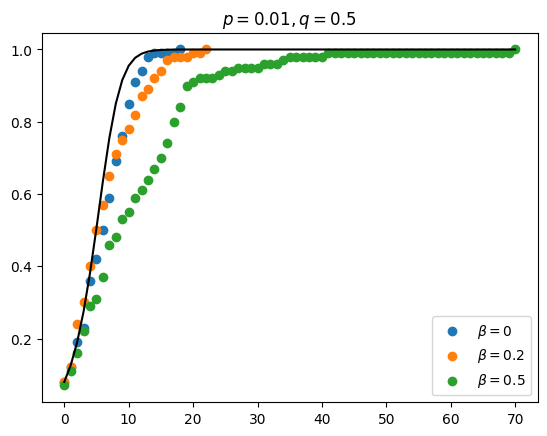

In [269]:
for p in [0, .01]:
    for q in [.25, .5]:
        for beta in [0, .2, .5]:
            temp = sim_random_eight(N=N, p=p, q=q, k=k, beta=beta)
            ts = np.arange(len(temp))
            t_temp = euler(8/N, func1, ts, p, q)
            plt.scatter(ts, temp, label=f'$\\beta = {beta}$')
        plt.plot(ts, t_temp, color='black')
        plt.title(f'$p={p}, q={q}$')
        plt.legend()
        plt.show()

In [253]:
g1 = make_graph(16, 0)

In [254]:
g1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))

In [255]:
g1.edges

EdgeView([(0, np.int64(1)), (0, np.int64(12)), (0, np.int64(13)), (0, np.int64(15)), (0, 3), (0, 4), (0, 5), (0, 7), (1, np.int64(2)), (1, np.int64(13)), (1, np.int64(14)), (1, np.int64(12)), (1, 4), (1, 5), (1, 6), (2, np.int64(3)), (2, np.int64(14)), (2, np.int64(15)), (2, np.int64(13)), (2, 5), (2, 6), (2, 7), (3, np.int64(15)), (3, np.int64(12)), (3, np.int64(14)), (3, 4), (3, 6), (3, 7), (4, np.int64(5)), (4, 7), (4, 8), (4, 9), (4, 11), (5, np.int64(6)), (5, 8), (5, 9), (5, 10), (6, np.int64(7)), (6, 9), (6, 10), (6, 11), (7, 8), (7, 10), (7, 11), (8, np.int64(9)), (8, 11), (8, 12), (8, 13), (8, 15), (9, np.int64(10)), (9, 12), (9, 13), (9, 14), (10, np.int64(11)), (10, 13), (10, 14), (10, 15), (11, 12), (11, 14), (11, 15), (12, np.int64(13)), (12, 15), (13, np.int64(14)), (14, np.int64(15))])

In [246]:
np.arange(25).reshape((5,5))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])